In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
df=pd.read_csv('/Users/tonydiana/Downloads/penguins.csv')

In [3]:
data=pd.DataFrame(data=df)
data1=data.dropna()

In [4]:
data1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [5]:
# To create a dummy variable
dummy=pd.get_dummies(data1['sex'])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


In [6]:
data1=pd.concat([data1, dummy], axis=1)
data1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,0,1


In [7]:
y=data1['female']
X=data1[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]

In [8]:
X.shape

(333, 3)

In [9]:
y.shape

(333,)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion[::-1,::1])
print('Classification Report: \n',classification_report(y_test, y_pred))


Confusion Matrix: 
 [[14 41]
 [49  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        55
           1       0.87      0.75      0.80        55

    accuracy                           0.82       110
   macro avg       0.83      0.82      0.82       110
weighted avg       0.83      0.82      0.82       110



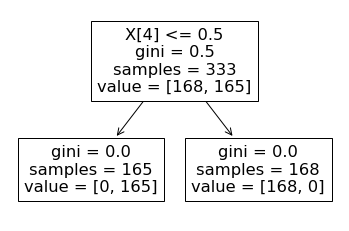

In [38]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf);